<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preface:-(Linear)-Difference-Equations" data-toc-modified-id="Preface:-(Linear)-Difference-Equations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preface: (Linear) Difference Equations</a></span><ul class="toc-item"><li><span><a href="#Linear-algebra-for-linear-difference-equations" data-toc-modified-id="Linear-algebra-for-linear-difference-equations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear algebra for linear difference equations</a></span></li><li><span><a href="#Exploring-behavior-of-a-second-order-linear-difference-equation" data-toc-modified-id="Exploring-behavior-of-a-second-order-linear-difference-equation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring behavior of a second order linear difference equation</a></span></li><li><span><a href="#&quot;Generating&quot;-values-of-$x_t$" data-toc-modified-id="&quot;Generating&quot;-values-of-$x_t$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>"Generating" values of $x_t$</a></span></li><li><span><a href="#Fibonacci-numbers-as-an-example" data-toc-modified-id="Fibonacci-numbers-as-an-example-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Fibonacci numbers as an example</a></span></li><li><span><a href="#Understanding-the-behavior-of-the-system" data-toc-modified-id="Understanding-the-behavior-of-the-system-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Understanding the behavior of the system</a></span></li><li><span><a href="#Eigenvalues-also-tell-us-about-the-behavior-of-the-linear-difference-equation" data-toc-modified-id="Eigenvalues-also-tell-us-about-the-behavior-of-the-linear-difference-equation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Eigenvalues also tell us about the behavior of the linear difference equation</a></span></li><li><span><a href="#More-properties-of-complex-roots" data-toc-modified-id="More-properties-of-complex-roots-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>More properties of complex roots</a></span></li></ul></li></ul></div>

<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Preface to the Samuelson Model: Difference Equations

Some of this lecture material came from the [Samuelson Multiplier-Accelerator lecture](https://python.quantecon.org/samuelson.html) from QuantEcon.

In [1]:
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, FloatSlider, IntSlider

%matplotlib inline

## Preface: (Linear) Difference Equations

Difference equations are equations that take the form

$$x_{t} = \phi(x_{t-1}, x_{t-2}, \dots, x_{t-k})$$

Linear difference equations are difference equations where $\phi$ is a linear function, aka,

$$x_{t} = \rho_1 x_{t-1} + \rho_2 x_{t-2} + \dots + \rho_k x_{t-k}$$

### Linear algebra for linear difference equations

Notice that a linear difference equation can be written as a matrix equation

$$\begin{bmatrix} x_{t} \\ x_{t-1} \\ x_{t-2} \\ \vdots \\ x_{t-k+1} \end{bmatrix} = \begin{bmatrix} \rho_1 & \rho_2 & \rho_3 & \dots & \rho_k \\ 1 & 0 & 0 & \dots & 0 \\ 0 & 1 & 0 & \dots & 0 \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 0 & 0 & \dots & 1 & 0 \end{bmatrix} \begin{bmatrix} x_{t-1} \\ x_{t-2} \\ x_{t-2} \\ \vdots \\ x_{t-k} \end{bmatrix}$$

We can use this formulation to write a function that can simulate a linear difference equation of any order that we want.

In [2]:
def simulate_lde(rhos, x0, T=50):
    """
    Simulates an order k linear difference equation using
    the matrix formulation
    
    Parameters
    ----------
    rhos : np.array(float, ndim=1)
        The (ordered) coefficients for the linear
        difference equation
    x0 : np.array(float, ndim=1)
        The k initial values of x
    T : int
        The length of the simulation
    
    Returns
    -------
    out : np.array(float, ndim=1)
        The values of x from the simulation
    """
    # Get the order of the LDE
    k = len(rhos)
    
    # Build the A matrix
    A = np.vstack([
        rhos, np.hstack([
            np.eye(k-1), np.zeros((k-1, 1))
        ])
    ])
    
    xout = np.zeros(T)
    for t in range(T):
        x0 = A @ x0
        xout[t] = x0[0]

    return xout

### Exploring behavior of a second order linear difference equation

Let's start by reminding ourselves what we can do with a second order linear difference equation (which will be key to the Samuelson model)

In [3]:
def plot_history_base(rho_1, rho_2, T):
    x0 = np.array([1.0, 0.5])
    rhos = np.array([rho_1, rho_2])
    
    xhist = simulate_lde(rhos, x0, T)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(xhist, color="k", linewidth=0.75, alpha=0.9)
    
    ax.set_title(
        r"Simulation with $\rho_1 = {}$ and $\rho_2 = {}$".format(
            rho_1, rho_2
        )
    )
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    return fig, ax

def plot_history_no_annotate(rho_1, rho_2, T):
    plot_history_base(rho_1, rho_2, T)
    pass

In [4]:
rho1_fs = FloatSlider(
    value=0.9, min=-2.0, max=2.0, step=0.1,
    description="rho_1"
)
rho2_fs = FloatSlider(
    value=0.0, min=-2.0, max=2.0, step=0.1,
    description="rho_2"
)
T_fs = IntSlider(
    value=25, min=25, max=1000, step=50,
    description="T"
)

interact(plot_history_no_annotate, rho_1=rho1_fs, rho_2=rho2_fs, T=T_fs);

interactive(children=(FloatSlider(value=0.9, description='rho_1', max=2.0, min=-2.0), FloatSlider(value=0.0, d…

### "Generating" values of $x_t$

Recall that when we find the eigenvalues, we also can obtain eigenvectors which satisfy

$$(A - \lambda_i I) v_i = 0$$

Let

* $\Lambda \equiv \text{diag}(\{\lambda_i \quad \forall i \})$ (a diagonal matrix with the eigenvalues on the diagonal) and
* $V \equiv \{v_i \quad \forall i \}$ (a matrix where each column is an eigenvector corresponding to the ith eigenvalue).

We can use the eigenvalues and eigenvectors to "diagonalize" our matrix $A$ which means we can write,

$$A \equiv V \Lambda V^{-1}$$

The eigenvectors also satisfy $V^{-1} V = I$

In [5]:
A = np.array([[0.9, 0.2], [1.0, 0.0]])

eigs, V = np.linalg.eig(A)
Vinv = np.linalg.inv(V)

In [6]:
Vinv @ V

array([[ 1.00000000e+00,  2.77555756e-17],
       [-1.11022302e-16,  1.00000000e+00]])

In [7]:
np.max(np.abs(A - (V @ np.diag(eigs) @ Vinv)))

2.220446049250313e-16

**Why is this helpful?**

Given an $X_0$, $X_t$ can be written as

$$X_t = A X_{t-1} = A A X_{t-2} = \dots = A^t X_0$$

but we know that $A \equiv V \Lambda V^{-1}$ which means

$$X_t = V \Lambda V^{-1} V \Lambda V^{-1} V \Lambda V^{-1} \dots$$

which reduces to

$$X_t = V \Lambda \Lambda \Lambda \dots V^{-1}$$

and since $\Lambda$ is diagonal this reduces to

$$\Lambda \Lambda \Lambda \dots = \begin{bmatrix} \lambda_1^t & 0 & 0 & 0 \\ 0 & \lambda_2^t & 0 & 0 \\ 0 & \dots & \ddots & 0 \\ 0 & 0 & \dots & \lambda_N^t \end{bmatrix}$$

so

$$X_t = \left(V \begin{bmatrix} \lambda_1^t & 0 & 0 & 0 \\ 0 & \lambda_2^t & 0 & 0 \\ 0 & \dots & \ddots & 0 \\ 0 & 0 & \dots & \lambda_N^t \end{bmatrix} V^{-1} \right) X_0$$

In [8]:
class LinearDifferenceEquation(object):
    """
    A class that takes a linear difference equation and
    can generate arbitrary elements of the sequence
    generated by the difference equation
    
    Parameters
    ----------
    rho : np.array(float, ndim=1)
        The parameter coefficients

    """
    def __init__(self, rho):
        self.rho = rho

        # Get the order of the LDE
        self.k = len(self.rho)

        # Build the A matrix
        self.A = np.vstack([
            self.rho, np.hstack([
                np.eye(self.k-1), np.zeros((self.k-1, 1))
            ])
        ])

        # Determine eigenvalues and eigenvectors
        self.eigs, self.V = np.linalg.eig(self.A)
        self.Vinv = np.linalg.inv(self.V)
        self.Lambda = np.diag(self.eigs)

    def xt_generate(self, x0, t):
        """
        Takes an initial value of x0 and a length of time
        and produces the value the linear difference
        equation would take at that period
        """
        return ((self.V @ np.diag(self.eigs**t) @ self.Vinv)@x0)[0]

### Fibonacci numbers as an example

Fibonacci numbers are given by $x_n = x_{n-1} + x_{n-2}$

In [9]:
fib_rhos = np.array([1.0, 1.0])

lde = LinearDifferenceEquation(fib_rhos)

In [10]:
# Generate the ith Fibonacci
i = 10
lde.xt_generate(np.array([1.0, 0.0]), i-1)

55.00000000000002

In [11]:
%timeit simulate_lde(fib_rhos, np.array([1.0, 0.0]), 250)

336 µs ± 5.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit lde.xt_generate(fib_rhos, 75)

7.09 µs ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Understanding the behavior of the system

Let's return to the matrix form of our second order linear difference equation,

$$\begin{bmatrix} x_{t} \\ x_{t-1} \end{bmatrix} = \begin{bmatrix} \rho_1 & \rho_2 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} x_{t-1} \\ x_{t-2} \end{bmatrix}$$

or

$$X_t = A X_{t-1}$$

where $X_t \equiv \begin{bmatrix} x_{t} \\ x_{t-1} \end{bmatrix}$


Let's start by finding the eigenvalues of $A$ which are values of $z$ such that

$$|A - z I| = 0$$

then $z$ satisfies

\begin{align*}
  0 &= | \begin{bmatrix} \rho_1 - z & \rho_2 \\ 1 & -z \end{bmatrix} | \\
  0 &= (\rho_1 - z) (-z) - \rho_2 \\
  0 &= z^2 -\rho_1 z - \rho_2
\end{align*}

We then have a quadratic equation in $z$. Let the roots of that equation be called $\lambda_1$ and $\lambda_2$ such that

$$(z - \lambda_1)(z - \lambda_2) = 0$$

$\lambda_1$ and $\lambda_2$ would be the eigenvalues.

### Eigenvalues also tell us about the behavior of the linear difference equation

Let's focus on the case of a second order difference equation to start. There will be two eigenvalues (they can possibly be the same).

The eigenvalues will either both be real or they will be a complex conjugate pair.

The graph that follows portrays the possible regions in which the $(\lambda_1, \lambda_2)$ can live:

- $(\lambda_1, \lambda_2)$ are complex with modulus less than $1$ - in this case, the $\{x_t\}$ sequence displays damped oscillations.  
- $(\lambda_1, \lambda_2)$ are both real, but one is strictly greater than $1$ - this leads to explosive growth.  
- $(\lambda_1, \lambda_2)$ are both real, but one is strictly less than $-1$ - this leads to explosive oscillations. 
- $(\lambda_1, \lambda_2)$ are both real and both are less than $1$ in absolute value - in this case, there is smooth convergence to the steady state without damped cycles.


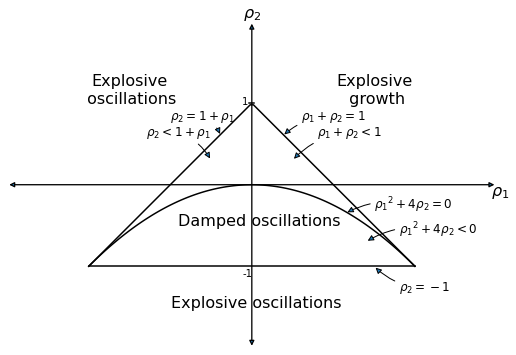

In [13]:
def param_plot():

    """This function creates the graph on page 189 of
    Sargent Macroeconomic Theory, second edition, 1987.
    """

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('equal')

    # Set axis
    xmin, ymin = -3, -2
    xmax, ymax = -xmin, -ymin
    plt.axis([xmin, xmax, ymin, ymax])

    # Set axis labels
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(r'$\rho_2$', fontsize=16)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel(r'$\rho_1$', rotation=0, fontsize=16)
    ax.yaxis.set_label_position('right')

    # Draw (t1, t2) points
    ρ1 = np.linspace(-2, 2, 100)
    ax.plot(ρ1, -abs(ρ1) + 1, c='black')
    ax.plot(ρ1, np.ones_like(ρ1) * -1, c='black')
    ax.plot(ρ1, -(ρ1**2 / 4), c='black')

    # Turn normal axes off
    for spine in ['left', 'bottom', 'top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add arrows to represent axes
    axes_arrows = {'arrowstyle': '<|-|>', 'lw': 1.3}
    ax.annotate('', xy=(xmin, 0), xytext=(xmax, 0), arrowprops=axes_arrows)
    ax.annotate('', xy=(0, ymin), xytext=(0, ymax), arrowprops=axes_arrows)

    # Annotate the plot with equations
    plot_arrowsl = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=-0.2"}
    plot_arrowsr = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=0.2"}
    ax.annotate(r'$\rho_1 + \rho_2 < 1$', xy=(0.5, 0.3), xytext=(0.8, 0.6),
                arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_1 + \rho_2 = 1$', xy=(0.38, 0.6), xytext=(0.6, 0.8),
                arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_2 < 1 + \rho_1$', xy=(-0.5, 0.3), xytext=(-1.3, 0.6),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = 1 + \rho_1$', xy=(-0.38, 0.6), xytext=(-1, 0.8),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = -1$', xy=(1.5, -1), xytext=(1.8, -1.3),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 = 0$', xy=(1.15, -0.35),
                xytext=(1.5, -0.3), arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 < 0$', xy=(1.4, -0.7),
                xytext=(1.8, -0.6), arrowprops=plot_arrowsr, fontsize='12')

    # Label categories of solutions
    ax.text(1.5, 1, 'Explosive\n growth', ha='center', fontsize=16)
    ax.text(-1.5, 1, 'Explosive\n oscillations', ha='center', fontsize=16)
    ax.text(0.05, -1.5, 'Explosive oscillations', ha='center', fontsize=16)
    ax.text(0.09, -0.5, 'Damped oscillations', ha='center', fontsize=16)

    # Add small marker to y-axis
    ax.axhline(y=1.005, xmin=0.495, xmax=0.505, c='black')
    ax.text(-0.12, -1.12, '-1', fontsize=10)
    ax.text(-0.12, 0.98, '1', fontsize=10)

    return fig

param_plot()
plt.show()

In [14]:
def plot_history_annotate(rho_1, rho_2, T):
    fig, ax = plot_history_base(rho_1, rho_2, T)
    
    ymin, ymax = ax.get_ylim()
    ymid, yrange = (ymax + ymin)/2, (ymax - ymin)
    y1, y2 = ymid + 0.3*yrange, ymid-0.3*yrange
    
    ax.set_xlim(0, 1.2*T)
    lambda_1, lambda_2 = np.roots([1.0, -rho_1, -rho_2])
    ax.annotate(
        r"$\lambda_1 = {}$".format(lambda_1),
        xy=(T, ymid + 0.3*yrange)
    )
    ax.annotate(
        r"Modulus of $\lambda_1 = {}$".format(abs(lambda_1)),
        xy=(T, ymid  + 0.15*yrange)
    )
    ax.annotate(
        r"$\lambda_2 = {}$".format(lambda_2),
        xy=(T, ymid - 0.3*yrange)
    )
    ax.annotate(
        r"Modulus of $\lambda_2 = {}$".format(abs(lambda_2)),
        xy=(T, ymid  - 0.45*yrange)
    )

    pass

In [15]:
rho1_fs = FloatSlider(
    value=0.9, min=-2.0, max=2.0, step=0.1,
    description="rho_1"
)
rho2_fs = FloatSlider(
    value=0.0, min=-2.0, max=2.0, step=0.1,
    description="rho_2"
)
T_fs = IntSlider(
    value=25, min=25, max=1000, step=50,
    description="T"
)

interact(plot_history_annotate, rho_1=rho1_fs, rho_2=rho2_fs, T=T_fs);

interactive(children=(FloatSlider(value=0.9, description='rho_1', max=2.0, min=-2.0), FloatSlider(value=0.0, d…

### More properties of complex roots

When the roots are complex, it is convenient to represent them in the
polar form

$$\lambda_1 =  r e^{i \omega}, \  \lambda_2 = r e^{-i \omega}$$

where $r$ is the *amplitude* of the complex number and $\omega$ is its *angle* or *phase*.

We are going to skip this today, but the short version is that:
* _Amplitude_ controls the distance between the top and bottom of a wave
* _Angle/Phase_ controls the distance between waves

To read more about the polar form, see the [QuantEcon Samuelson lecture](https://python.quantecon.org/samuelson.html) or [here](https://www.varsitytutors.com/hotmath/hotmath_help/topics/polar-form-of-a-complex-number).